In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[-0.67461827, -0.3928177 , -0.50089687,  0.37565533,  0.40488389,
         0.38861139, -0.00315586, -0.46158237, -0.23786623, -0.22794148],
       [ 0.53386329,  0.09264544, -0.15852549, -0.6702488 , -0.7597388 ,
         0.97450092,  1.13690089,  1.07543049, -0.43910798, -0.05948129]])

In [4]:
test_Features[:2]

array([[-0.74245695, -0.35235018, -0.42789432,  0.0594772 ,  0.31439261,
         0.53346861,  0.25724058,  0.25295057,  1.596644  , -0.7375292 ],
       [-0.81167888, -0.65232444, -1.05529306,  0.98995991,  0.5976303 ,
         0.08870854, -0.34243458,  0.22610547,  0.2594495 , -0.05894603]])

In [5]:
train_Label[:4]

array([1, 1, 1, 1])

In [6]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [7]:
train_Features.shape

(12743, 10, 1)

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Conv1D(filters=30*9,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(10,1), 
                 activation='relu'))

In [11]:
model.add(MaxPooling1D(pool_size=1))

In [12]:
model.add(Conv1D(filters=30*8,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [13]:
model.add(MaxPooling1D(pool_size=1))

In [14]:
model.add(Conv1D(filters=30*7,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [15]:
model.add(MaxPooling1D(pool_size=1))

In [16]:
model.add(Conv1D(filters=30*6,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [17]:
model.add(MaxPooling1D(pool_size=1))

In [18]:
model.add(Conv1D(filters=30*5,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [19]:
model.add(MaxPooling1D(pool_size=1))

In [20]:
model.add(Conv1D(filters=30*4,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [21]:
model.add(MaxPooling1D(pool_size=1))

In [22]:
model.add(Conv1D(filters=30*3,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [23]:
model.add(MaxPooling1D(pool_size=1))

In [24]:
model.add(Conv1D(filters=30*2,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [25]:
model.add(MaxPooling1D(pool_size=1))

In [26]:
model.add(Conv1D(filters=30,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [27]:
model.add(MaxPooling1D(pool_size=1))

In [28]:
model.add(Flatten())

In [29]:
model.add(Dense(10, activation='tanh'))

In [30]:
model.add(Dense(1,activation='sigmoid'))

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 10, 270)           540       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 270)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 240)           65040     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 240)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 10, 210)           50610     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 210)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 180)           37980     
__________

In [32]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [33]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=400,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/30
10194/10194 [==============================] - 38s 4ms/step - loss: 0.5381 - acc: 0.7367 - val_loss: 0.3834 - val_acc: 0.8395
Epoch 2/30
10194/10194 [==============================] - 26s 3ms/step - loss: 0.3808 - acc: 0.8345 - val_loss: 0.3457 - val_acc: 0.8545
Epoch 3/30
10194/10194 [==============================] - 23s 2ms/step - loss: 0.3630 - acc: 0.8443 - val_loss: 0.3456 - val_acc: 0.8568
Epoch 4/30
10194/10194 [==============================] - 28s 3ms/step - loss: 0.3551 - acc: 0.8491 - val_loss: 0.3528 - val_acc: 0.8501
Epoch 5/30
10194/10194 [==============================] - 38s 4ms/step - loss: 0.3525 - acc: 0.8510 - val_loss: 0.3354 - val_acc: 0.8580
Epoch 6/30
10194/10194 [==============================] - 30s 3ms/step - loss: 0.3508 - acc: 0.8558 - val_loss: 0.3255 - val_acc: 0.8658
Epoch 7/30
10194/10194 [==============================] - 29s 3ms/step - loss: 0.3415 - acc: 0.8593 - val_loss: 0.3173 - val_acc:

In [34]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

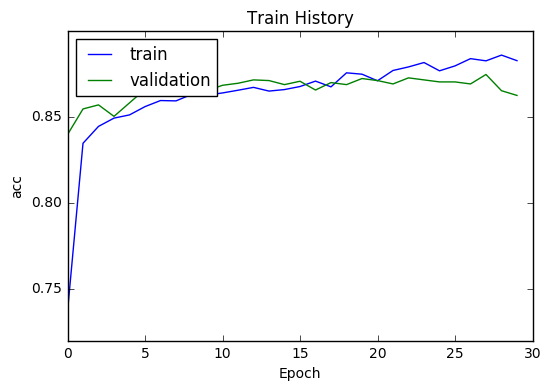

In [35]:
show_train_history(train_history,'acc','val_acc')

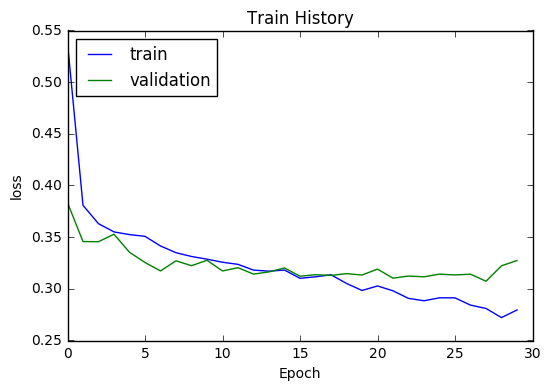

In [36]:
show_train_history(train_history,'loss','val_loss')

In [37]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 4s 582us/step


In [38]:
scores[1]

0.8639477457574015